# The MPG value of cars

## 0. Packages

In [81]:
# Handle table-like data and matrices calculation
import numpy as np
import scipy as sp
import pandas as pd


# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# Modelling Algorithms
# I will look at only four classification algorithms: LogisticRegression, GaussianNB, SVM, RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale, StandardScaler
# from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

#### Some useful functions

In [2]:
def print_columns(df):
    print "There are",df.shape[1],'columns'
    print "They are:"
    for i in df.columns.values:
        print i
        
def list_null(df):
    print df.shape[1],' columns:'
    for i in df.columns.values:
        print i,': number of nan: ',df[i].isnull().sum(),', ',df[i].dtypes

# 1. Get to know our dataset

In [3]:
origin=pd.read_csv('auto-mpg.csv',sep=',')

In [4]:
origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham
1,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
2,17.0,8,304.0,150.0,3672,11.5,72,1,amc ambassador sst
3,19.4,6,232.0,90.0,3210,17.2,78,1,amc concord
4,24.3,4,151.0,90.0,3003,20.1,80,1,amc concord


In [5]:
print_columns(origin)

There are 9 columns
They are:
mpg
cylinders
displacement
horsepower
weight
acceleration
model_year
origin
car_name


mpg is the dependent value, which need to be picked out later!!

In [6]:
list_null(origin)

9  columns:
mpg : number of nan:  0 ,  float64
cylinders : number of nan:  0 ,  int64
displacement : number of nan:  0 ,  float64
horsepower : number of nan:  6 ,  float64
weight : number of nan:  0 ,  int64
acceleration : number of nan:  0 ,  float64
model_year : number of nan:  0 ,  int64
origin : number of nan:  0 ,  int64
car_name : number of nan:  0 ,  object


In [7]:
origin.describe()

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 2. Clean our dataset

There is only one feature has null value and it only has 6 values, so We can try using average value

In [8]:
hp=pd.DataFrame()
hp['hp']=origin.horsepower
hp['hp'][hp.hp.isnull()]=hp['hp'].mean()

In [9]:
origin.horsepower.isnull().sum()

6

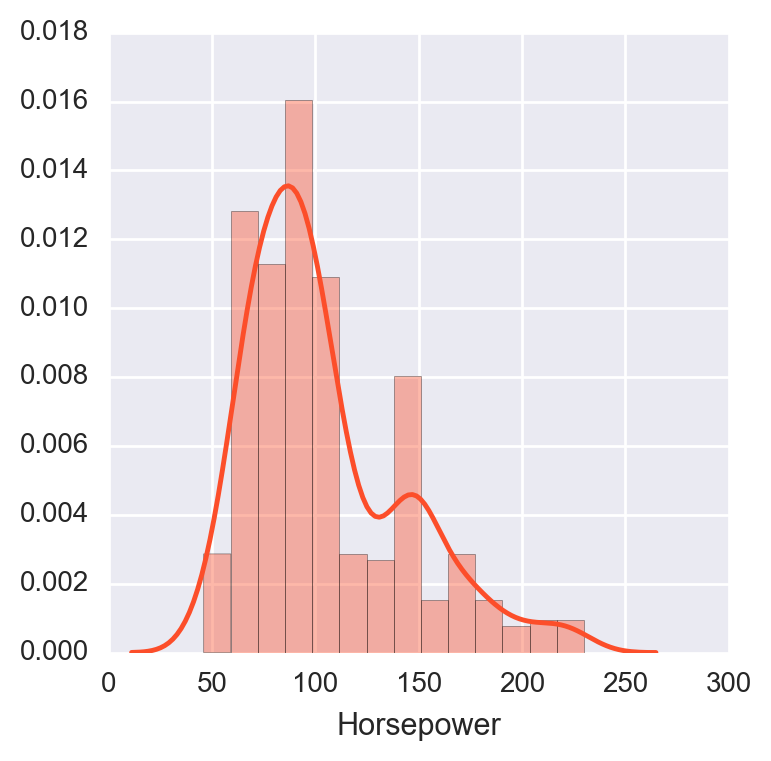

In [10]:
fig,axes=plt.subplots(1,1,figsize=(4,4))

sns.distplot(hp['hp'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=None,color='#fc4e2a', vertical=False, norm_hist=False, axlabel='Horsepower', label=None, ax=None)

In [11]:
hp1=pd.DataFrame()
hp1['hp']=origin.horsepower
average_hp   = hp1["hp"].mean()
std_hp       = hp1["hp"].std()
count_nan_hp = hp1["hp"].isnull().sum()
rand = np.random.randint(average_hp - std_hp,average_hp + std_hp, size = count_nan_hp)
hp1['hp'][hp1.hp.isnull()] = rand

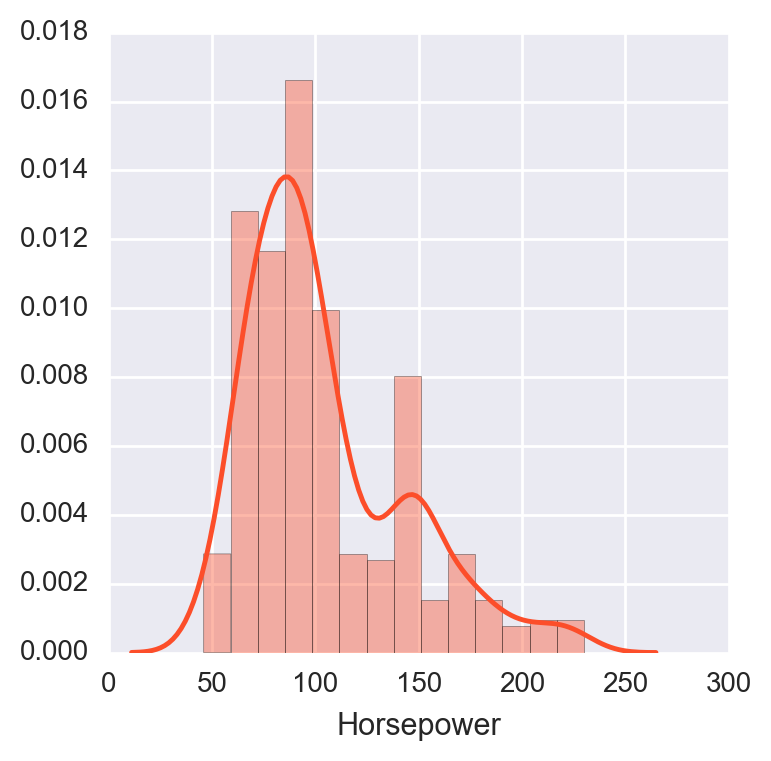

In [12]:
fig,axes=plt.subplots(1,1,figsize=(4,4))
sns.distplot(hp1['hp'], kde=True, rug=False,fit=None, hist_kws=None,kde_kws=None,color='#fc4e2a', vertical=False, norm_hist=False, axlabel='Horsepower', label=None, ax=None)

These two pictures show that there are now big difference between the mean value filled null and normal distribution filled null. So for simplicity, I will do the mean value fill null

In [13]:
origin['horsepower'][origin.horsepower.isnull()]=origin.horsepower.mean()

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
list_null(origin)

9  columns:
mpg : number of nan:  0 ,  float64
cylinders : number of nan:  0 ,  int64
displacement : number of nan:  0 ,  float64
horsepower : number of nan:  0 ,  float64
weight : number of nan:  0 ,  int64
acceleration : number of nan:  0 ,  float64
model_year : number of nan:  0 ,  int64
origin : number of nan:  0 ,  int64
car_name : number of nan:  0 ,  object


Now let's look at the correlation between all the quantities

## 3. Correlation of data

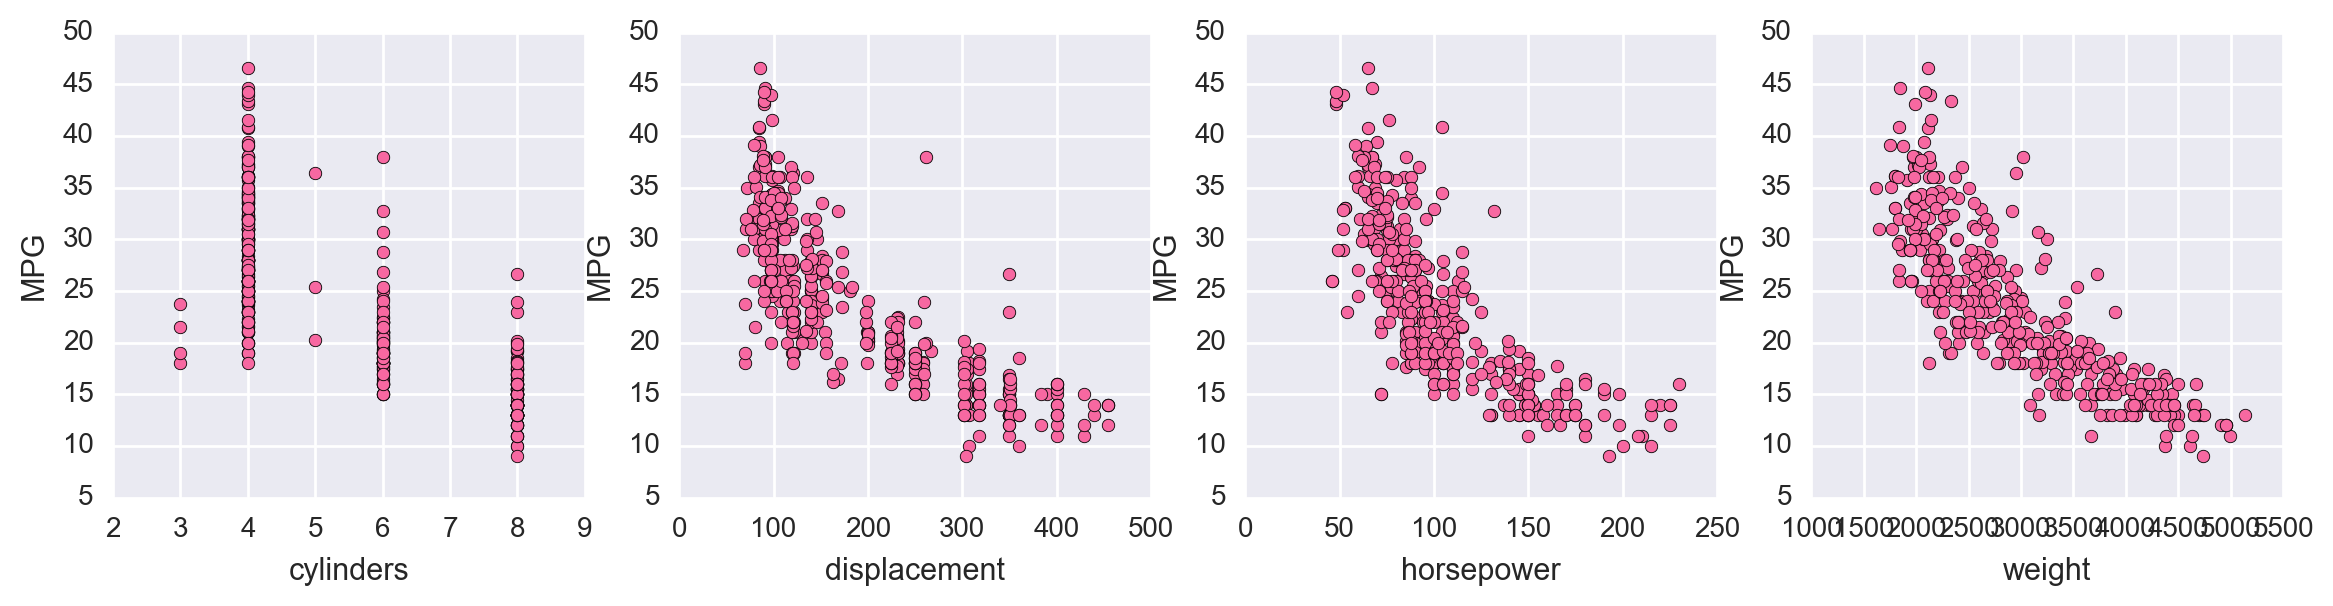

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(14,3))

for i in range(1,5):
    axes[i-1].scatter(origin[origin.columns.values[i]], origin['mpg'],c='#f768a1', marker="o")
    axes[i-1].set_xlabel(origin.columns.values[i])
    axes[i-1].set_ylabel("MPG")

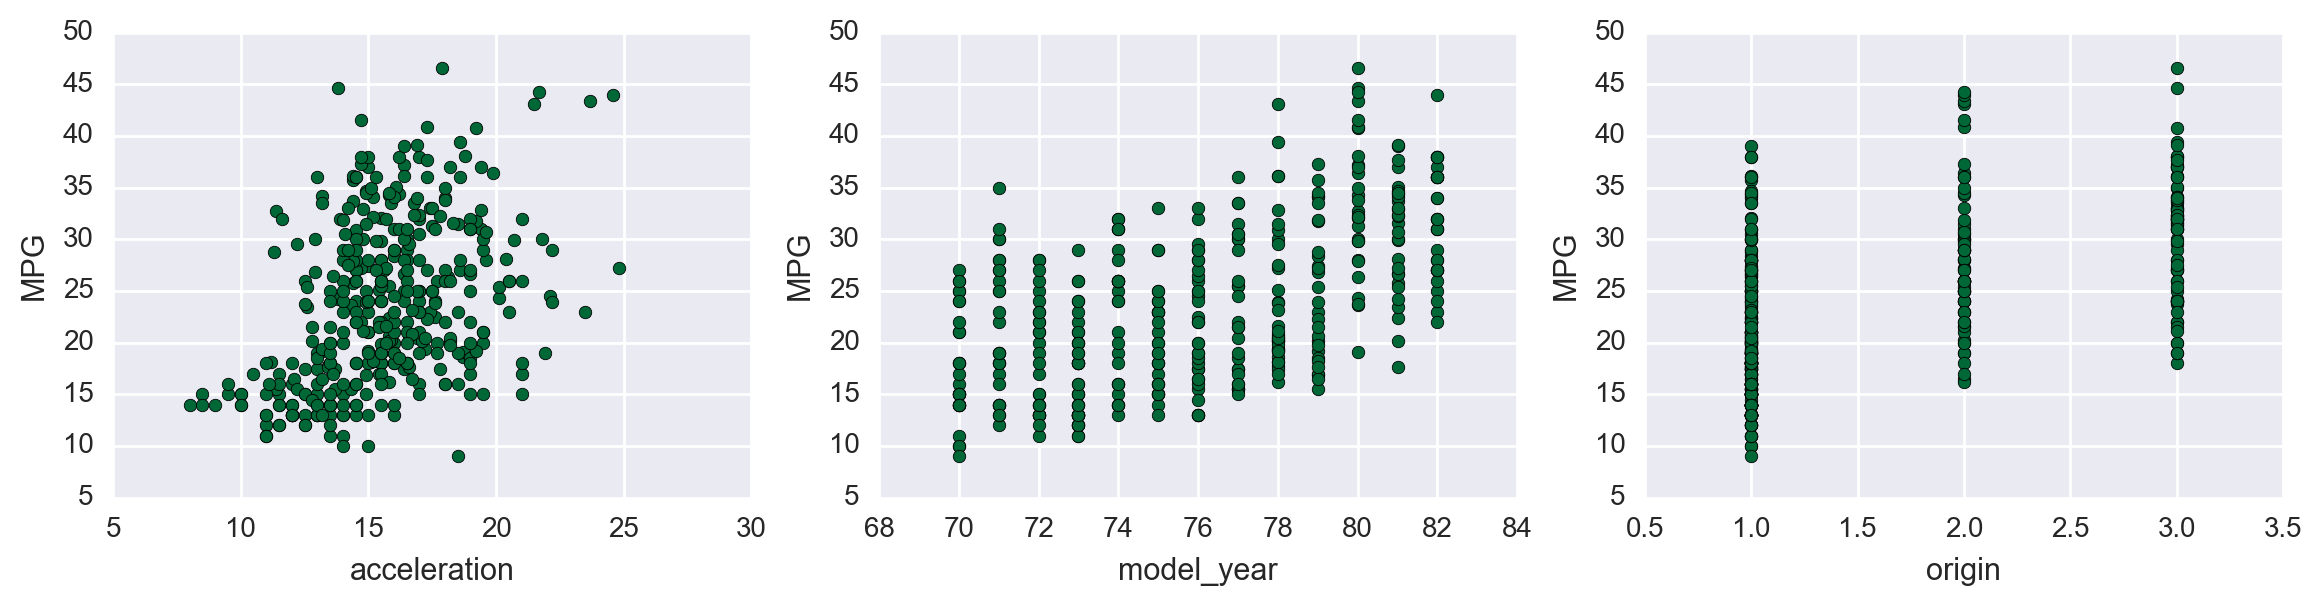

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(14,3))

for i in range(5,8):
    axes[i-5].scatter(origin[origin.columns.values[i]], origin['mpg'],c='#006837', marker="o")
    axes[i-5].set_xlabel(origin.columns.values[i])
    axes[i-5].set_ylabel("MPG")

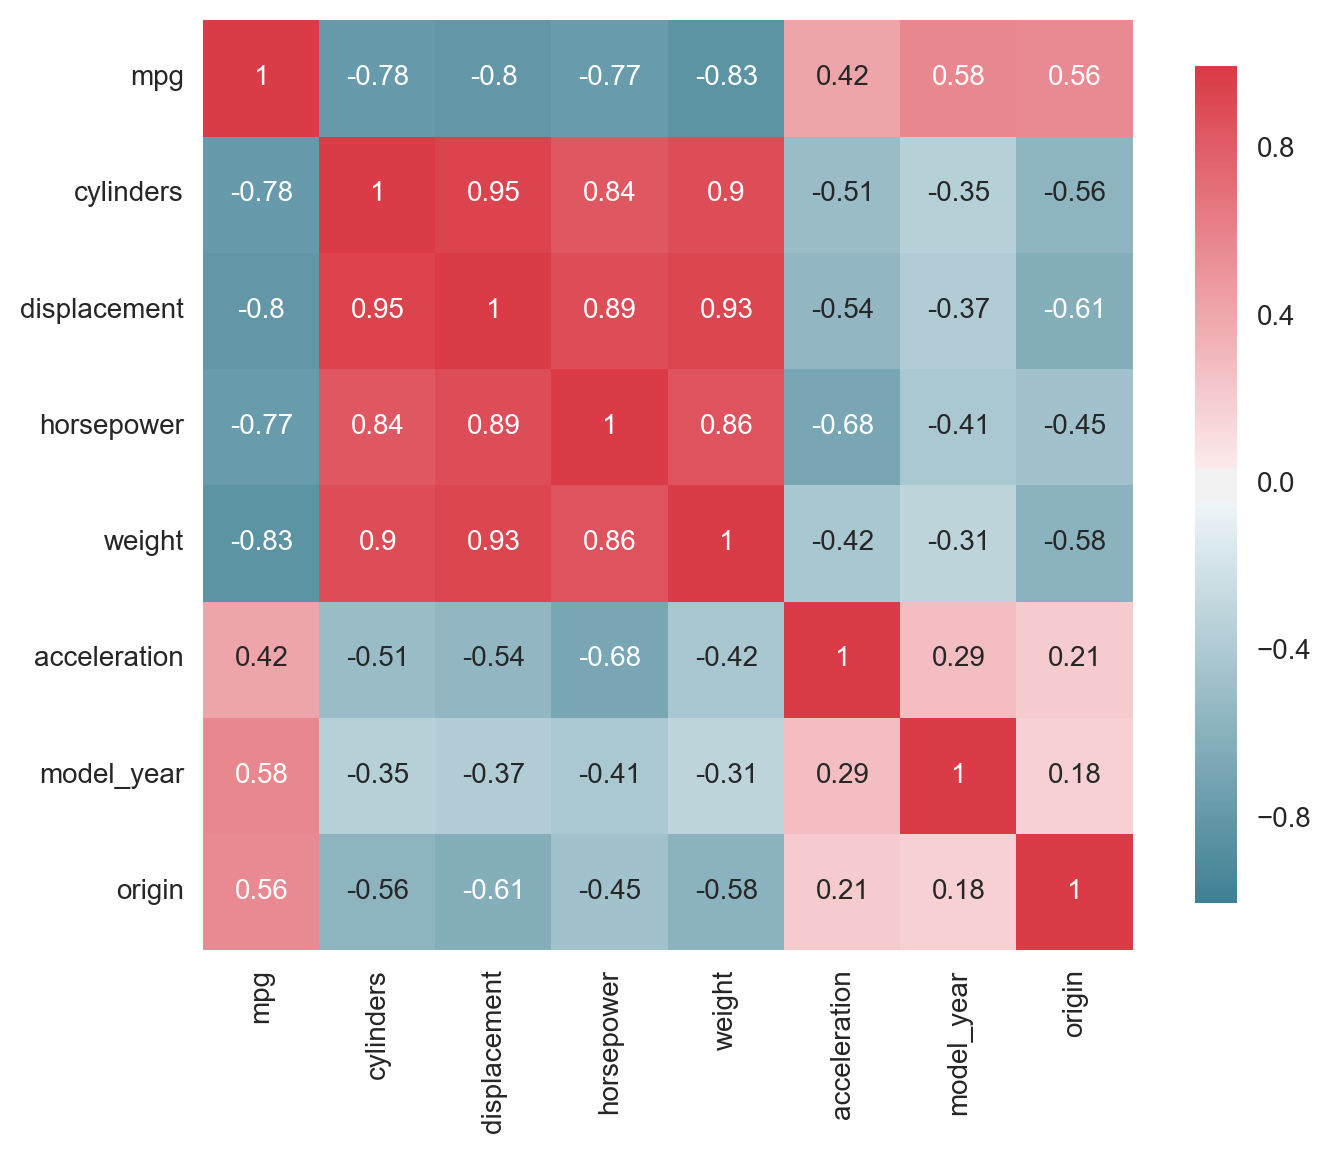

In [17]:
corr = origin.corr()
figure, ax = plt.subplots( figsize =( 8 , 6 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
correlation = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 10 })

In [18]:
origin.columns.values

array(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'], dtype=object)

In [19]:
newdf=pd.DataFrame()
newdf=origin[origin.columns.values]

In [20]:
print origin['mpg'].corr(np.log(origin['displacement']))
newdf['log_displacement']=np.log(origin['displacement'])

-0.828391723234


In [21]:
print origin['mpg'].corr(np.log(origin['horsepower']))
newdf['log_horsepower']=np.log(origin['horsepower'])

-0.808432652866


In [22]:
print origin['mpg'].corr(origin['weight'])
print origin['mpg'].corr(np.log(origin['weight']))
newdf['log_weight']=np.log(origin['weight'])

-0.831740933244
-0.843979109061


In [23]:
print origin['mpg'].corr(origin['origin'])
print origin['mpg'].corr(np.log(origin['origin']))
newdf['log_origin']=np.log(origin['origin'])

0.563450359774
0.574050221607


In [24]:
print origin['mpg'].corr(origin['acceleration'])
print origin['mpg'].corr(np.log(origin['acceleration']))

0.420288912102
0.433531995544


In [25]:
origin.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham
1,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl
2,17.0,8,304.0,150.0,3672,11.5,72,1,amc ambassador sst
3,19.4,6,232.0,90.0,3210,17.2,78,1,amc concord
4,24.3,4,151.0,90.0,3003,20.1,80,1,amc concord


In [26]:
newdf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,log_displacement,log_horsepower,log_weight,log_origin
0,13.0,8,360.0,175.0,3821,11.0,73,1,amc ambassador brougham,5.886104,5.164786,8.248267,0.0
1,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,5.966147,5.247024,8.255828,0.0
2,17.0,8,304.0,150.0,3672,11.5,72,1,amc ambassador sst,5.717028,5.010635,8.208492,0.0
3,19.4,6,232.0,90.0,3210,17.2,78,1,amc concord,5.446737,4.499810,8.074026,0.0
4,24.3,4,151.0,90.0,3003,20.1,80,1,amc concord,5.017280,4.499810,8.007367,0.0


In [27]:
newdf.drop(['displacement','horsepower'],axis=1,inplace=True)

In [28]:
newdf.drop(['log_origin','weight'],axis=1,inplace=True)

In [29]:
newdf.head()

,mpg,cylinders,acceleration,model_year,origin,car_name,log_displacement,log_horsepower,log_weight
0,13.0,8,11.0,73,1,amc ambassador brougham,5.886104,5.164786,8.248267
1,15.0,8,8.5,70,1,amc ambassador dpl,5.966147,5.247024,8.255828
2,17.0,8,11.5,72,1,amc ambassador sst,5.717028,5.010635,8.208492
3,19.4,6,17.2,78,1,amc concord,5.446737,4.499810,8.074026
4,24.3,4,20.1,80,1,amc concord,5.017280,4.499810,8.007367


In [30]:
newdf['car_type']=newdf['car_name'].apply(lambda x: x.split(' ')[0])


In [31]:
newdf['car_type'].loc[392:397]='volkswagen'

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [32]:
newdff=newdf.drop('car_name',axis=1)

In [33]:
newdf.head()

,mpg,cylinders,acceleration,model_year,origin,car_name,log_displacement,log_horsepower,log_weight,car_type
0,13.0,8,11.0,73,1,amc ambassador brougham,5.886104,5.164786,8.248267,amc
1,15.0,8,8.5,70,1,amc ambassador dpl,5.966147,5.247024,8.255828,amc
2,17.0,8,11.5,72,1,amc ambassador sst,5.717028,5.010635,8.208492,amc
3,19.4,6,17.2,78,1,amc concord,5.446737,4.499810,8.074026,amc
4,24.3,4,20.1,80,1,amc concord,5.017280,4.499810,8.007367,amc


## 4. Training the model

In [59]:
X=pd.DataFrame()
Y=pd.DataFrame()

In [60]:
newdf.columns.values

array(['mpg', 'cylinders', 'acceleration', 'model_year', 'origin',
       'car_name', 'log_displacement', 'log_horsepower', 'log_weight',
       'car_type'], dtype=object)

In [61]:
X=newdf[['cylinders', 'acceleration', 'model_year', 'origin', 'log_displacement', 'log_horsepower', 'log_weight']]
Y=newdf[['mpg']]

In [65]:
list_null(X)

7  columns:
cylinders : number of nan:  0 ,  int64
acceleration : number of nan:  0 ,  float64
model_year : number of nan:  0 ,  int64
origin : number of nan:  0 ,  int64
log_displacement : number of nan:  0 ,  float64
log_horsepower : number of nan:  0 ,  float64
log_weight : number of nan:  0 ,  float64


In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [76]:
# Test options and evaluation metric

num_folds=10
seed=7
scoring='neg_mean_squared_error'

In [69]:
# Spot-Check Algorithms

models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [77]:
# evaluate each model in turn

results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

LR:-9.714521 (2.646846)
LASSO:-17.538414 (4.084272)
EN:-16.991666 (3.459547)
KNN:-13.803080 (3.122461)
CART:-15.379893 (8.309700)
SVR:-17.687818 (6.603737)


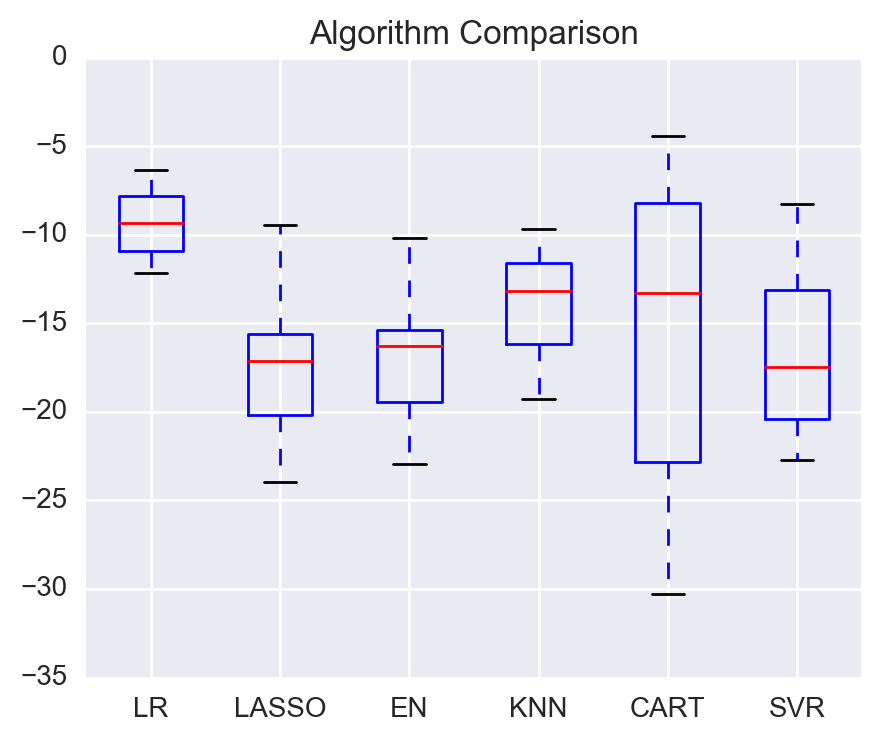

In [79]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names)


### 4.1 Evaluate Algorithms: Standardization

In [82]:
# Standardize the dataset

pipelines=[]
pipelines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

In [83]:
results=[]
names=[]
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print msg

ScaledLR:-9.714521 (2.646846)
ScaledLASSO:-11.693368 (3.136226)
ScaledEN:-12.636176 (3.585737)
ScaledKNN:-9.588639 (3.513261)
ScaledCART:-15.589649 (8.216297)
ScaledSVR:-9.882221 (3.506172)


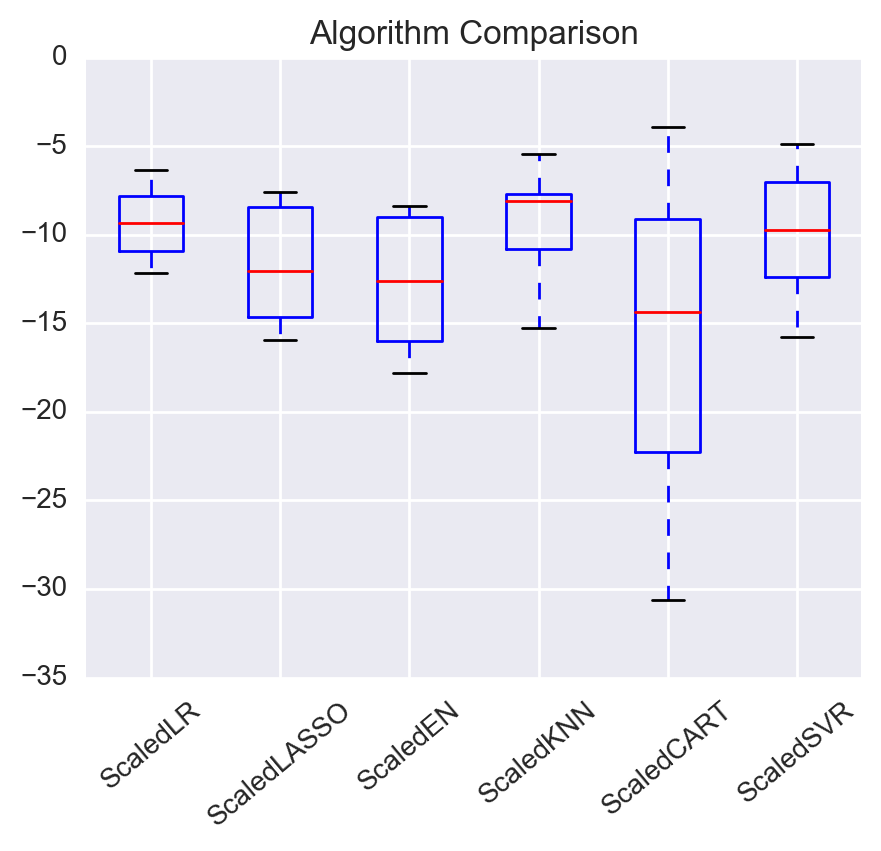

In [85]:
fig,ax=plt.subplots(1,1,figsize=(5,4))

ax.set_title('Algorithm Comparison')
ax.boxplot(results)
ax.set_xticklabels(names,rotation=40)


#### Improve KNN parameters

In [91]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
k_values=np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid=dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaledX,Y_train)

In [92]:
print "Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_)
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print "%f (%f) with: %r" % (mean,stdev,param)

Best: -9.409441 using {'n_neighbors': 7}
-10.962830 (5.905658) with: {'n_neighbors': 1}
-9.619231 (4.897574) with: {'n_neighbors': 3}
-9.450420 (3.385481) with: {'n_neighbors': 5}
-9.409441 (3.288658) with: {'n_neighbors': 7}
-9.624892 (3.068838) with: {'n_neighbors': 9}
-9.924835 (2.873884) with: {'n_neighbors': 11}
-9.858759 (3.014621) with: {'n_neighbors': 13}
-10.173289 (3.266915) with: {'n_neighbors': 15}
-9.985254 (3.169912) with: {'n_neighbors': 17}
-10.047511 (3.146009) with: {'n_neighbors': 19}
-10.156122 (3.328099) with: {'n_neighbors': 21}
